# Lead Scoring Case Study


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

 <img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg" Alt= "Lead Conversion Process - Demonstrated as a funnel">

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Data
> You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

Goals of the Case Study
There are quite a few goals for this case study:
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Import 

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import lead dataset
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Check

In [4]:
lead_df.shape

(9240, 37)

In [5]:
# Check non null count and datatype of the variables
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Total 7 numeric columns and 30 categorical columns.
- None of the columns have inconsistent datatype, hence no conversion is required.

In [6]:
# Remove if there are any duplicates
lead_df.drop_duplicates(subset=None, inplace=True)

In [7]:
lead_df.shape

(9240, 37)

In [8]:
#Statistical summary of dataset:-

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers ,because there is significant difference between average and max values.

In [9]:
# As per problem statement few columns have value 'Select'. Let us find the columns

In [10]:
cols=list(lead_df.columns)
for i in cols:
    if 'Select' in lead_df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [11]:
# Looks like from column names user has not selected value, so we can replace those to nulls

In [12]:
# Imputing 'Select' with NaN'  :-

lead_df = lead_df.replace('Select', np.nan)

In [13]:
# Check if Select value is present

In [14]:
cols=list(lead_df.columns)
for i in cols:
    if 'Select' in lead_df[i].values:
        print(i)

In [15]:
# Checking Null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [16]:
# % of null values
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
#Let us remove columns having more than 30% null values

In [18]:
missing_columns_30 = lead_df.columns[100*(lead_df.isnull().sum()/len(lead_df)) > 30]

In [19]:
missing_columns_30

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [20]:
# Specialization can be set to Others
missing_columns_30 = missing_columns_30.drop('Specialization')

In [21]:
lead_df = lead_df.drop(missing_columns_30, axis=1).copy()

In [22]:
lead_df.shape

(9240, 28)

In [23]:
# Checking the remaining columns for missing values:-

round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
# Let us handle columns one by one

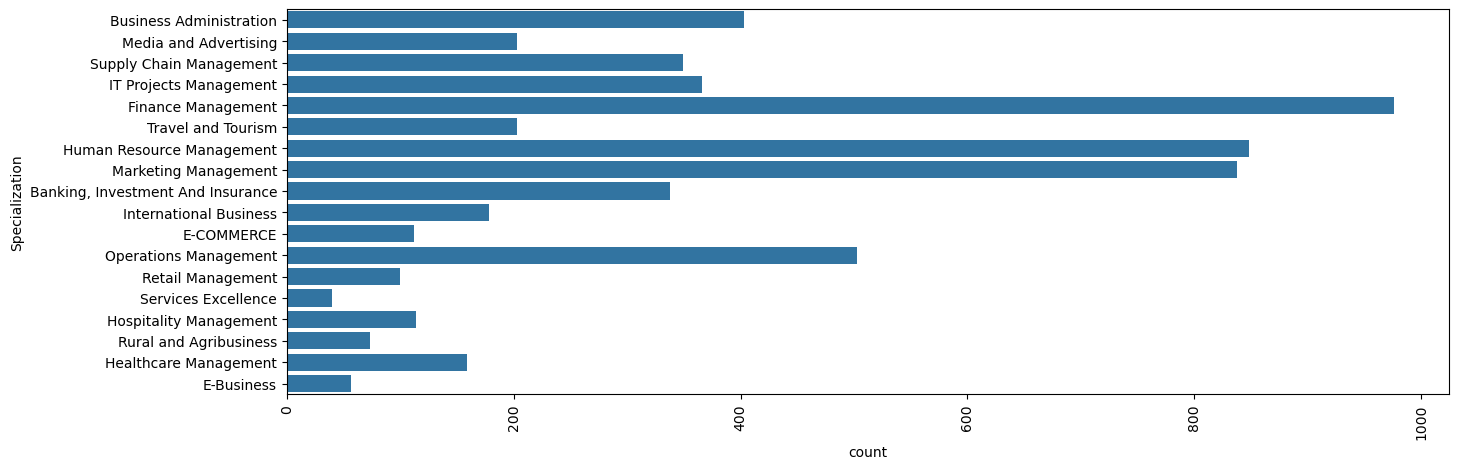

In [25]:
# Plotting count plot of 'Specialization' to see the data distribution:-

plt.figure(figsize=(15,5))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [26]:
# We can say student has not decided specialization while filling the form. So we can replace it with 'Others'

In [27]:
lead_df['Specialization'].fillna('Others',inplace=True)

In [28]:
lead_df['Specialization'].value_counts()

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [29]:
lead_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

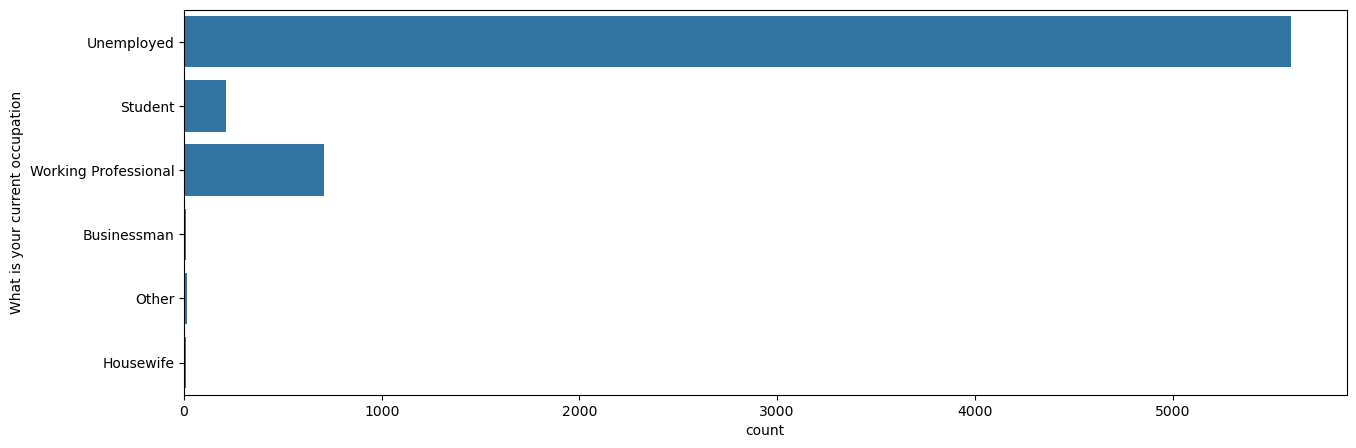

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(lead_df['What is your current occupation'])
plt.show()

In [31]:
# Unemployed are highest.

In [32]:
lead_df['What is your current occupation'].fillna('Unemployed',inplace=True)

In [33]:
lead_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [34]:
lead_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

In [35]:
# Almost 99.9% people are saying Better career prospect
# Lets replace null values with that 

In [36]:
lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [37]:
lead_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [38]:
lead_df['Country'].value_counts(normalize=True)*100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

In [39]:
# Impute data with 'India'

In [40]:
lead_df['Country'].fillna('India',inplace=True)

In [41]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [42]:
# Drop the rows where data is null as % is very low

In [43]:
lead_df.dropna(inplace = True)

In [44]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)


Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [45]:
# Percentage of rows retained 
(len(lead_df.index)/9240)*100

98.2034632034632

In [46]:
# Good Ammount of data is retained
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


### Exploratory Data Anaysis

### Univariate Analysis and Bivariate Analysis

Converted

In [47]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

37% leads are converted

In [48]:
def counterplot(x,hue):
    plt.figure(figsize=(13,5))
    sns.countplot(x = x, hue = hue, data = lead_df,palette='Set1')
    plt.xticks(rotation = 90)

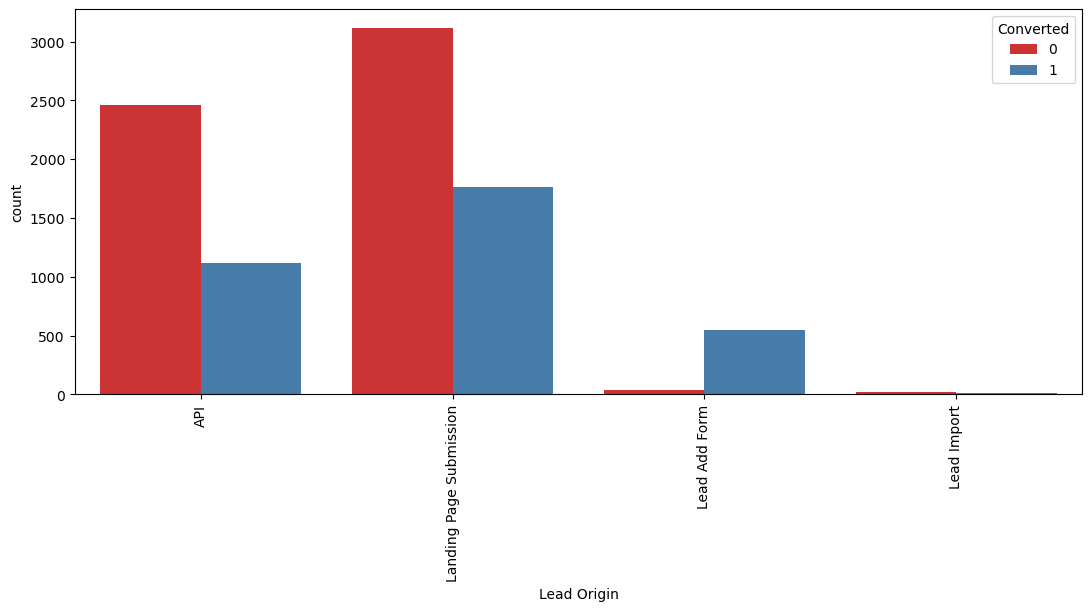

In [49]:
#Lead Origin

counterplot("Lead Origin","Converted")

- Lead Import are very less
- Lead Add form conversion is very high but count is not that high
- Need to imporve conversion from API and Page submission

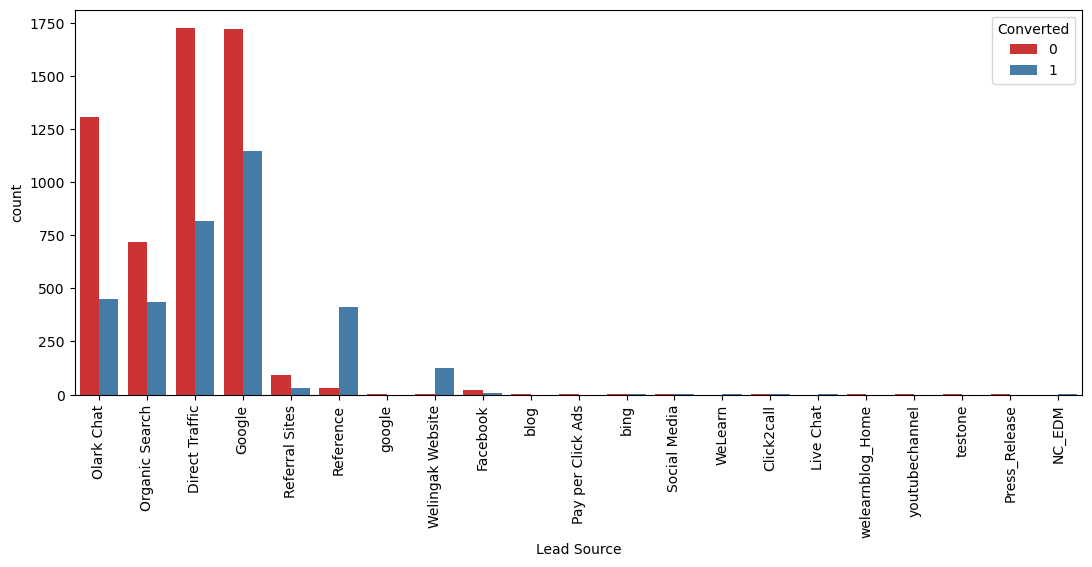

In [50]:
counterplot("Lead Source","Converted")

In [51]:
# Need to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

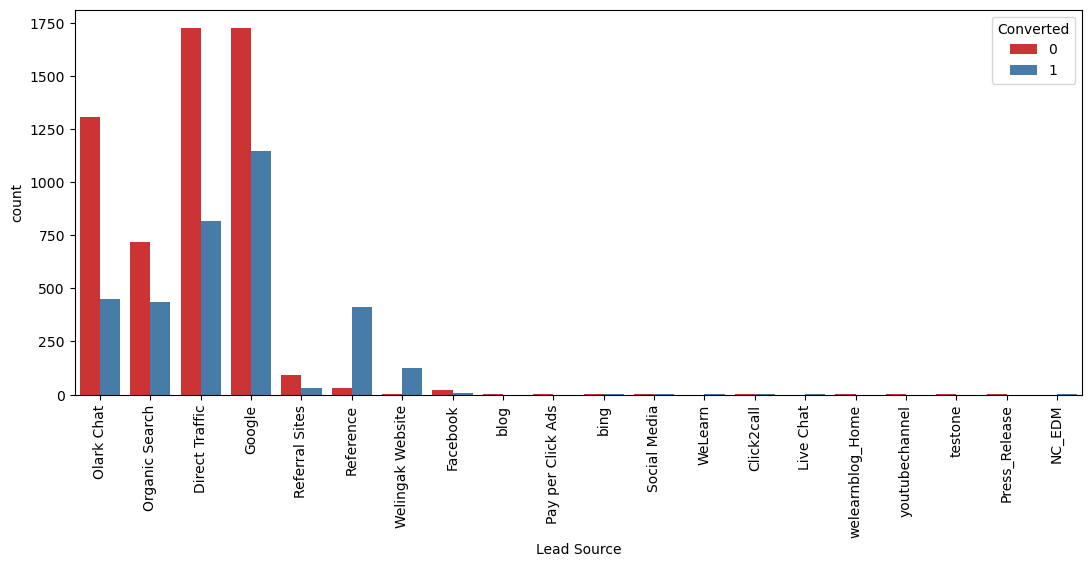

In [52]:
counterplot("Lead Source","Converted")

- There are 7 to 8 big sounces and rest are very low in count

In [53]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

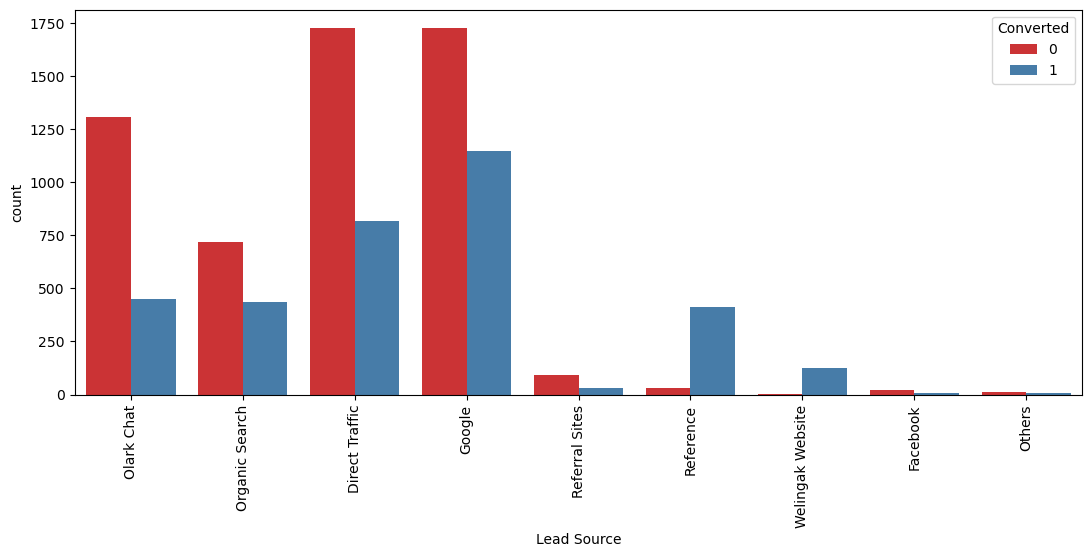

In [54]:
counterplot("Lead Source","Converted")

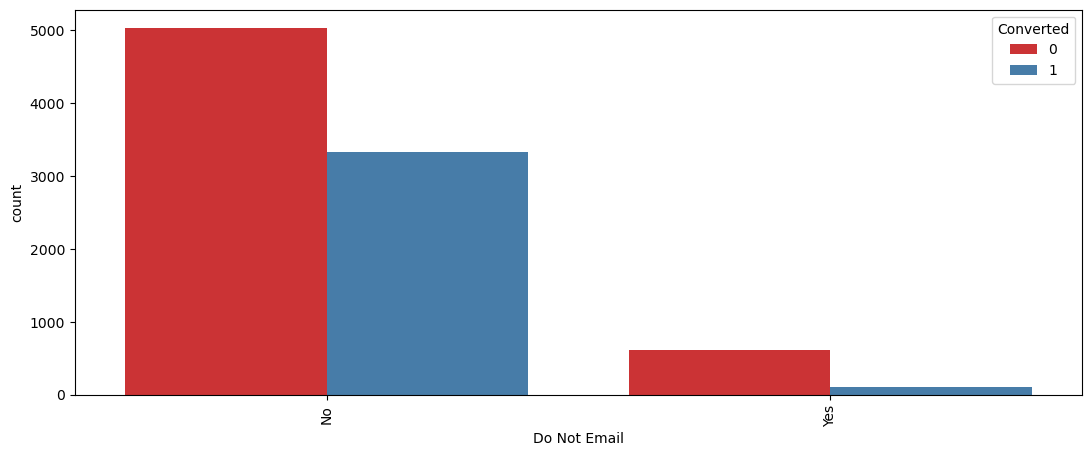

In [55]:
counterplot("Do Not Email","Converted")

- Most entries are NO

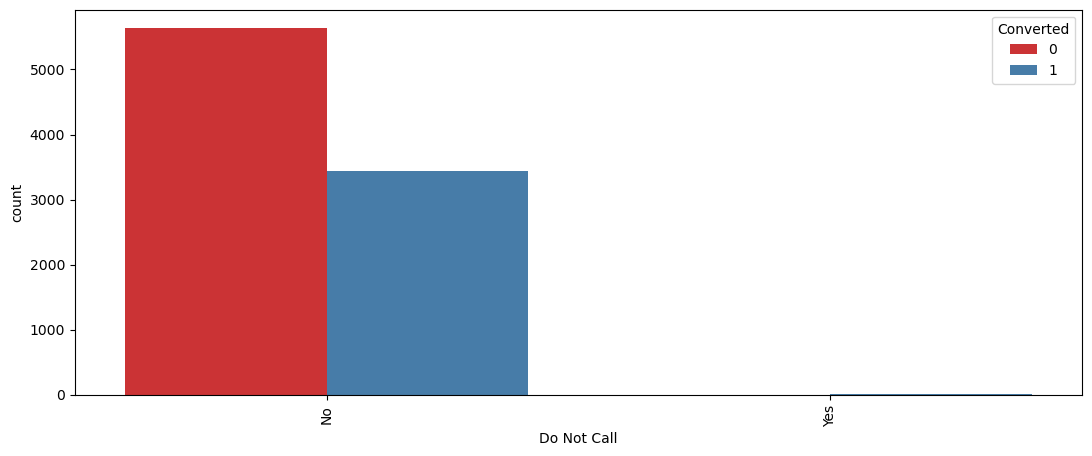

In [56]:
counterplot("Do Not Call","Converted")

- Most entries are NO

In [57]:
lead_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [58]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

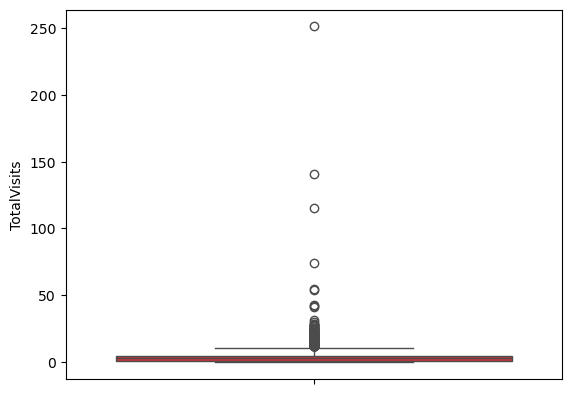

In [59]:
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set1')

- We can see there are many outliers. We can use 99th percentile to cap value

In [60]:
per = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= per[0]] = per[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= per[1]] = per[1]

<Axes: ylabel='TotalVisits'>

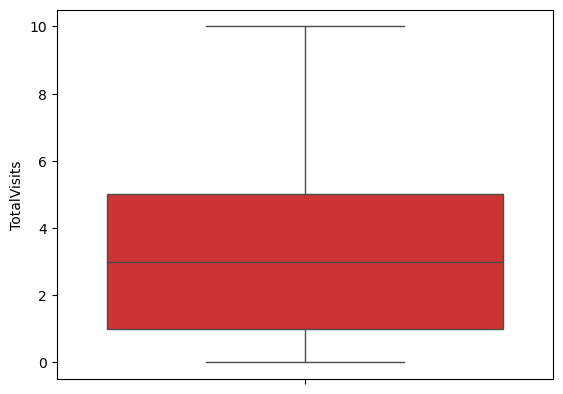

In [61]:
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set1')

<Axes: ylabel='Total Time Spent on Website'>

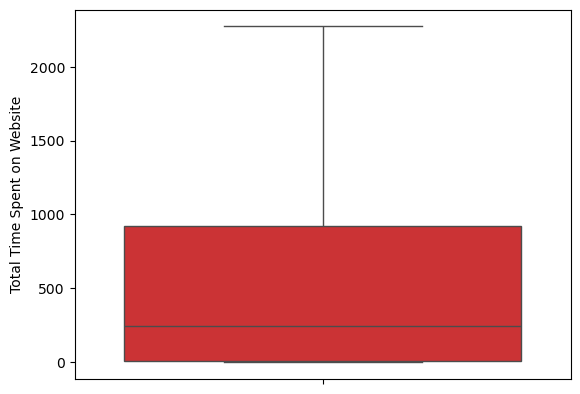

In [62]:
sns.boxplot(lead_df['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: ylabel='Page Views Per Visit'>

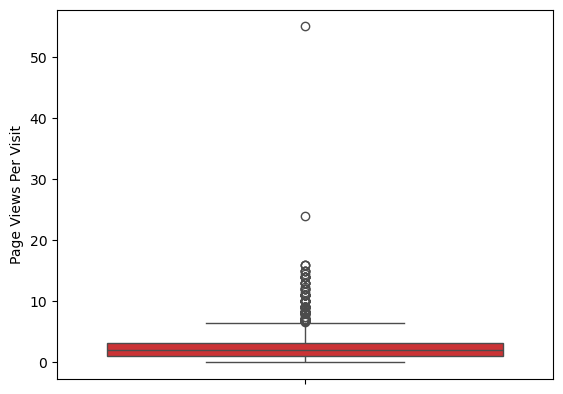

In [63]:
sns.boxplot(lead_df['Page Views Per Visit'],orient='vert',palette='Set1')

- We can see some outliers 

In [64]:
lead_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [65]:
perc = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= perc[0]] = perc[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= perc[1]] = perc[1]

<Axes: ylabel='Page Views Per Visit'>

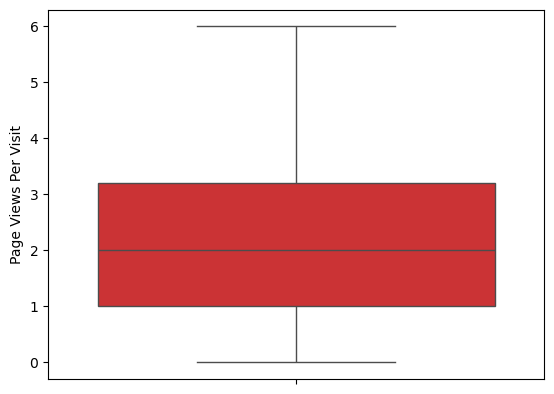

In [66]:
sns.boxplot(lead_df['Page Views Per Visit'],orient='vert',palette='Set1')

In [67]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

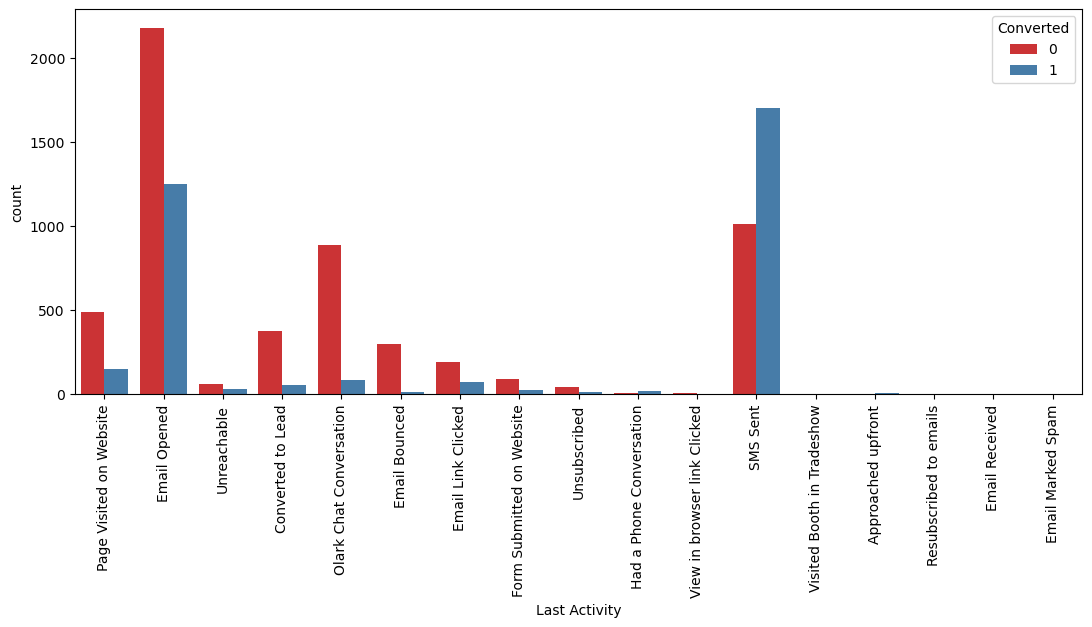

In [68]:
counterplot("Last Activity","Converted")

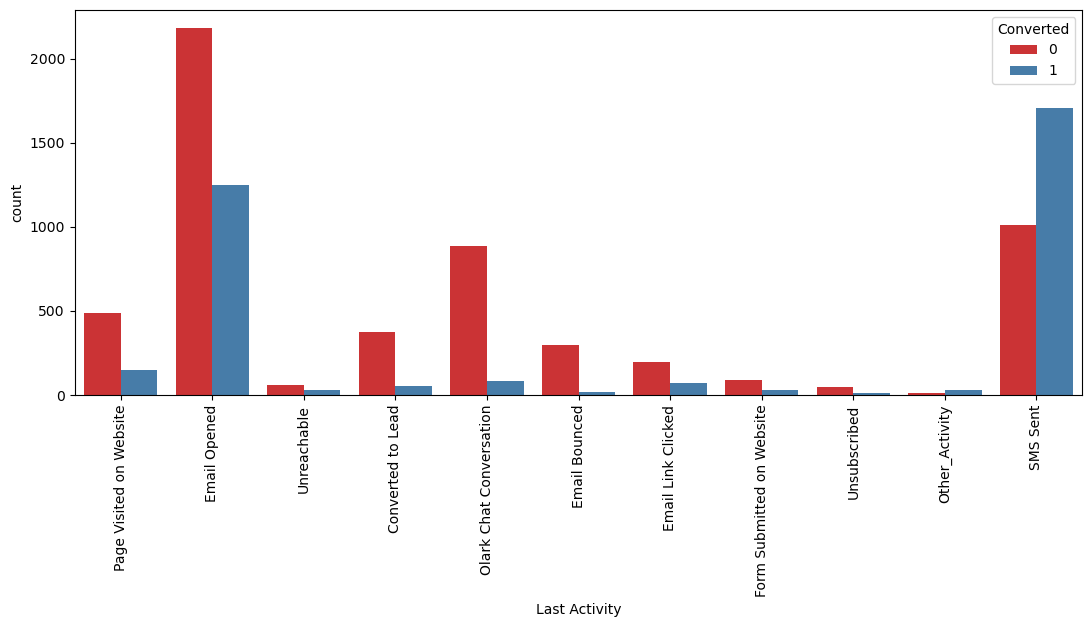

In [69]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

counterplot("Last Activity","Converted")

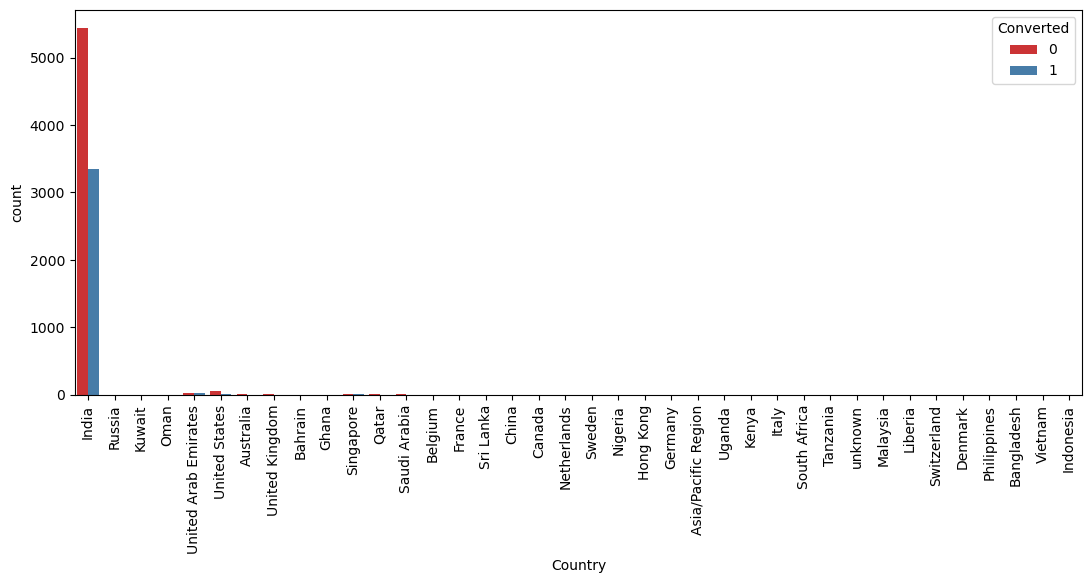

In [70]:
counterplot("Country","Converted")

- Most of the values are India

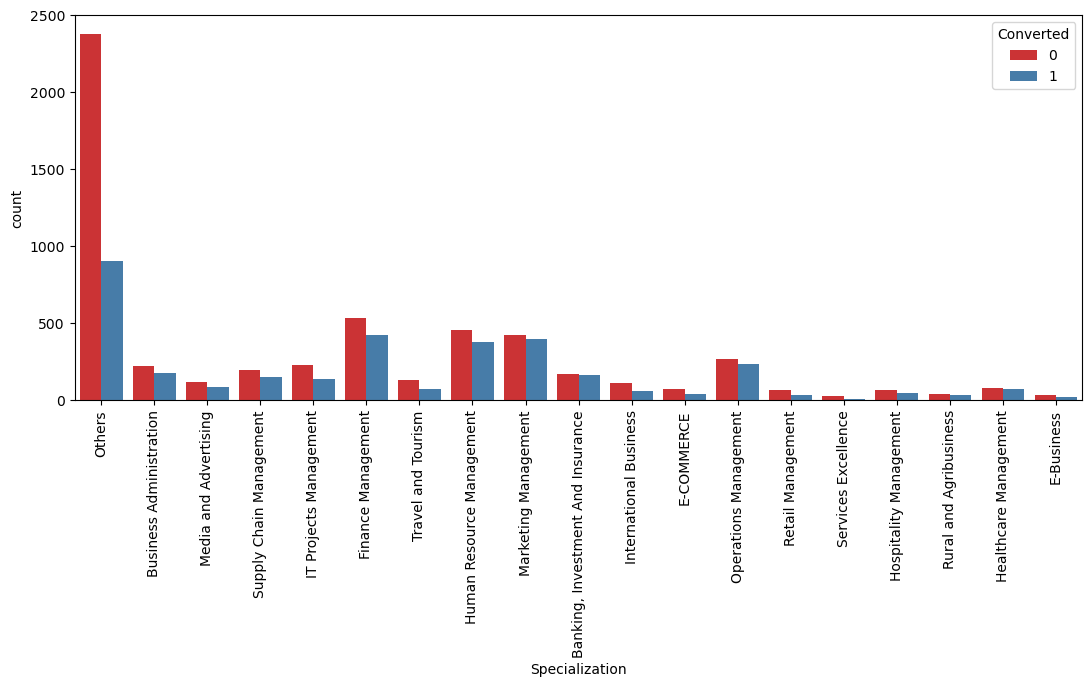

In [71]:
counterplot("Specialization","Converted")

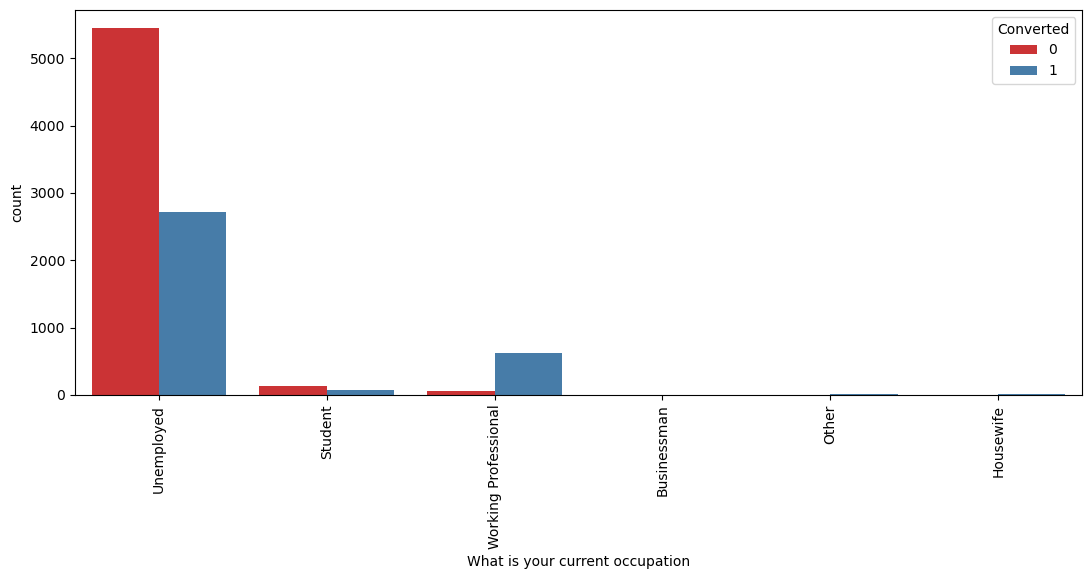

In [72]:
counterplot("What is your current occupation","Converted")

- Working professional conversion rate is very high
- Unemployed count is high and conversion is ~40%

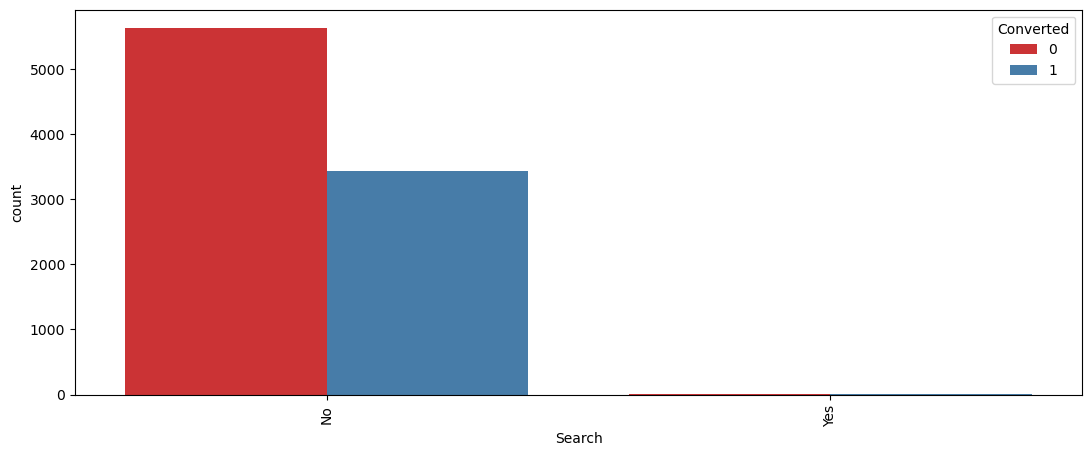

In [73]:
counterplot("Search","Converted")

- Most of the values are No

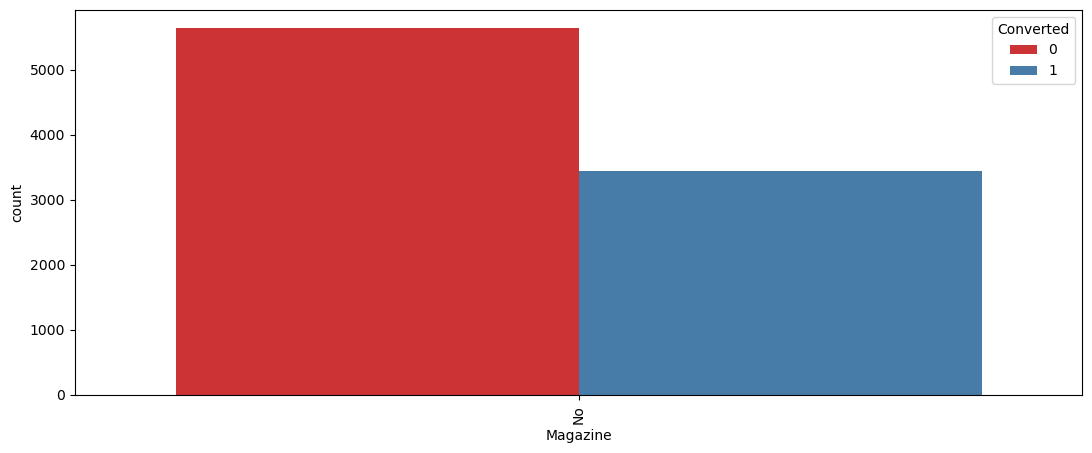

In [74]:
counterplot("Magazine","Converted")

- All values are No

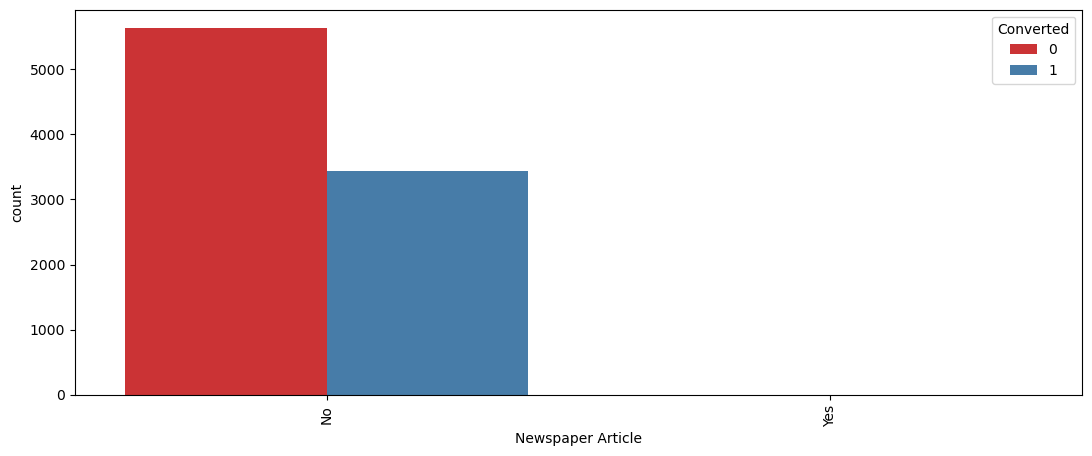

In [75]:
counterplot("Newspaper Article","Converted")

- Most of the values are No

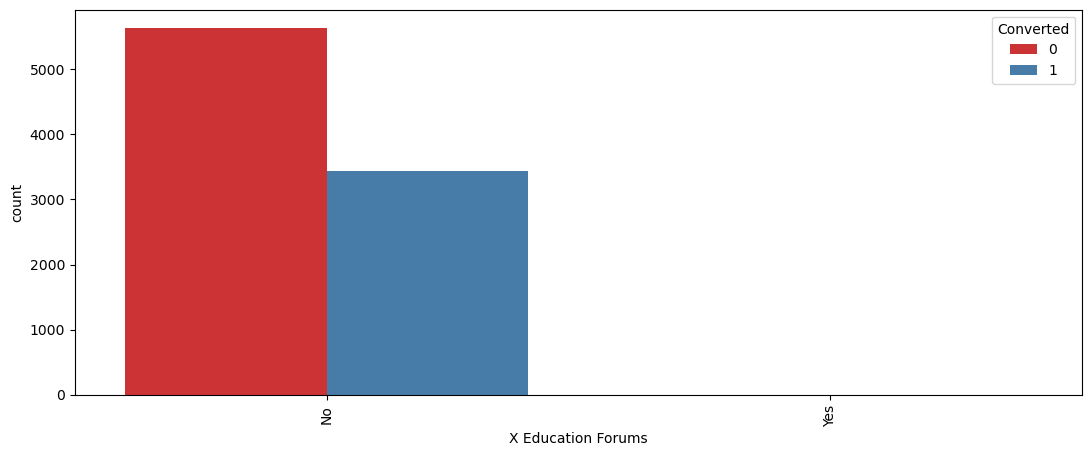

In [76]:
counterplot("X Education Forums","Converted")

- Most of the values are NO

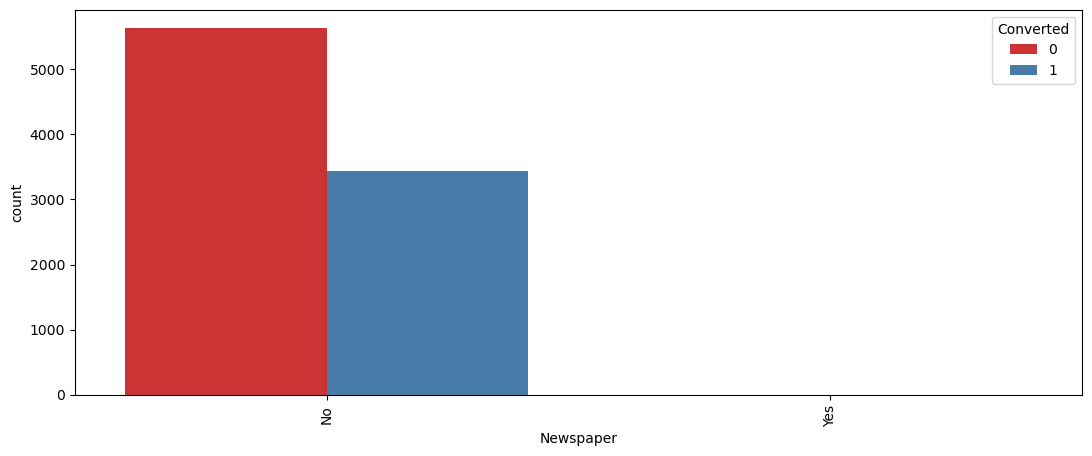

In [77]:
counterplot("Newspaper","Converted")

- Most of the values are NO

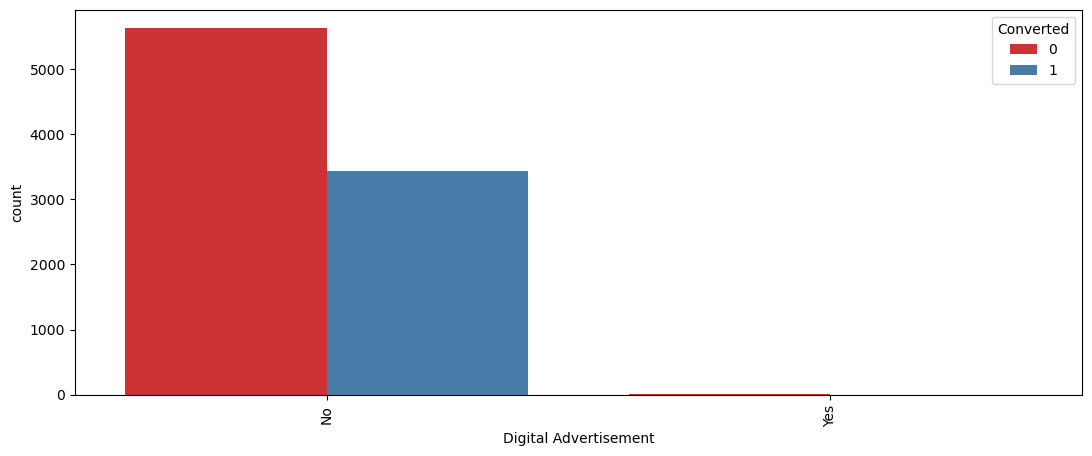

In [78]:
counterplot("Digital Advertisement","Converted")

- Most of the values are NO

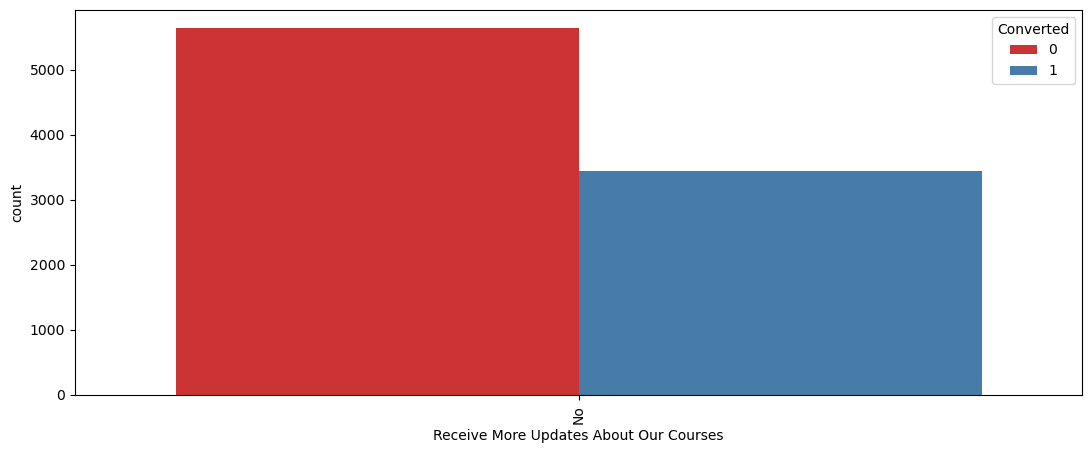

In [79]:
counterplot("Receive More Updates About Our Courses","Converted")

- All values are NO

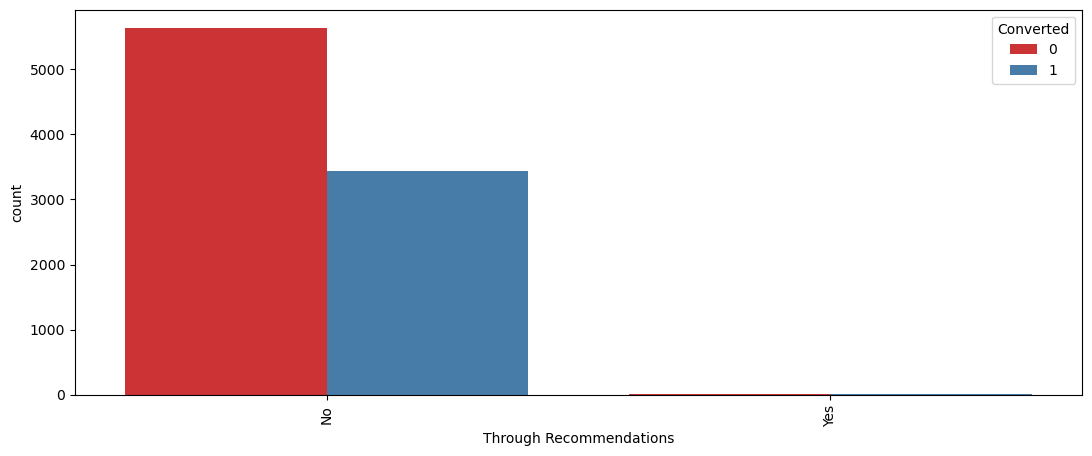

In [80]:
counterplot("Through Recommendations","Converted")

- Most of the values are NO

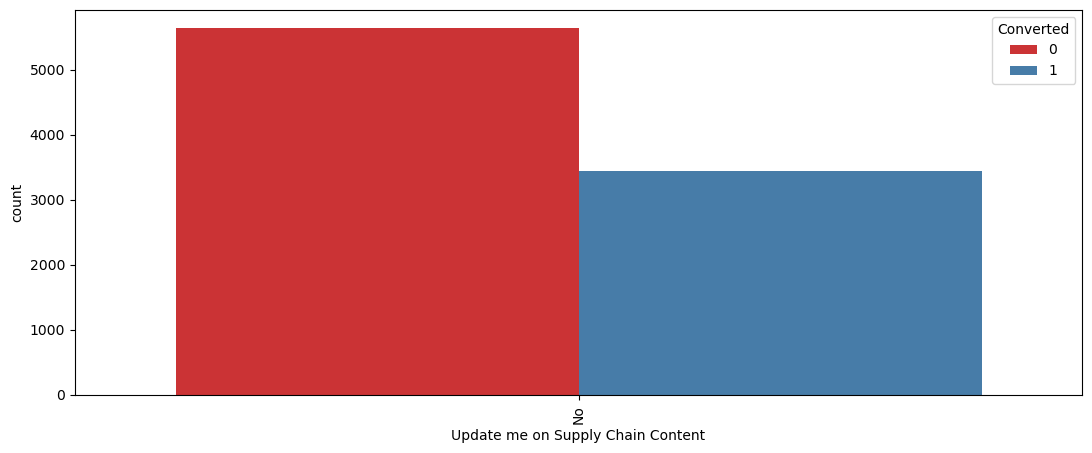

In [81]:
counterplot("Update me on Supply Chain Content","Converted")

- All values are NO

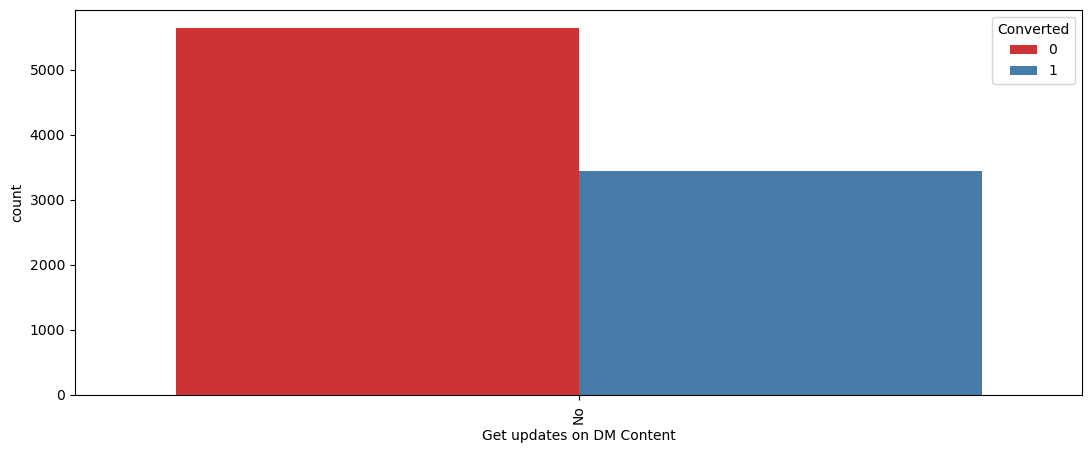

In [82]:
counterplot("Get updates on DM Content","Converted")

- All values are NO

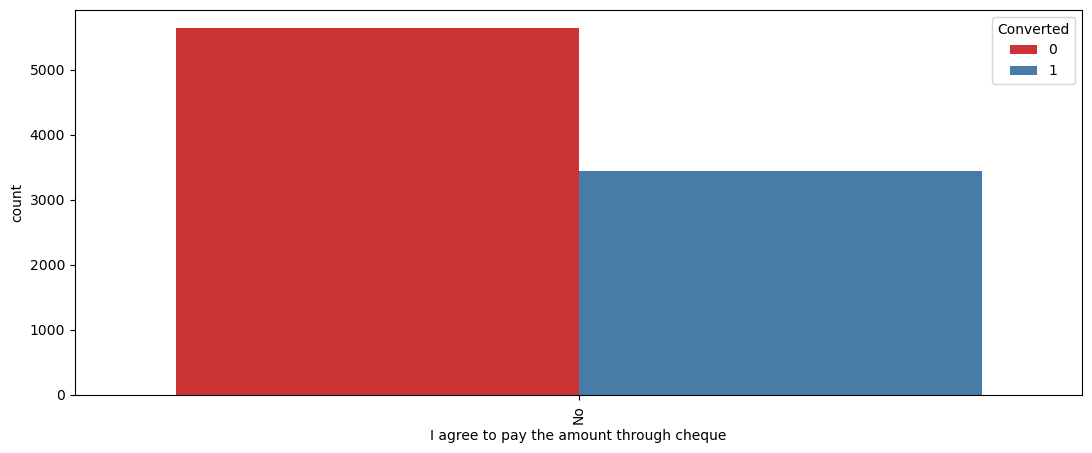

In [83]:
counterplot("I agree to pay the amount through cheque","Converted")

- All values are NO

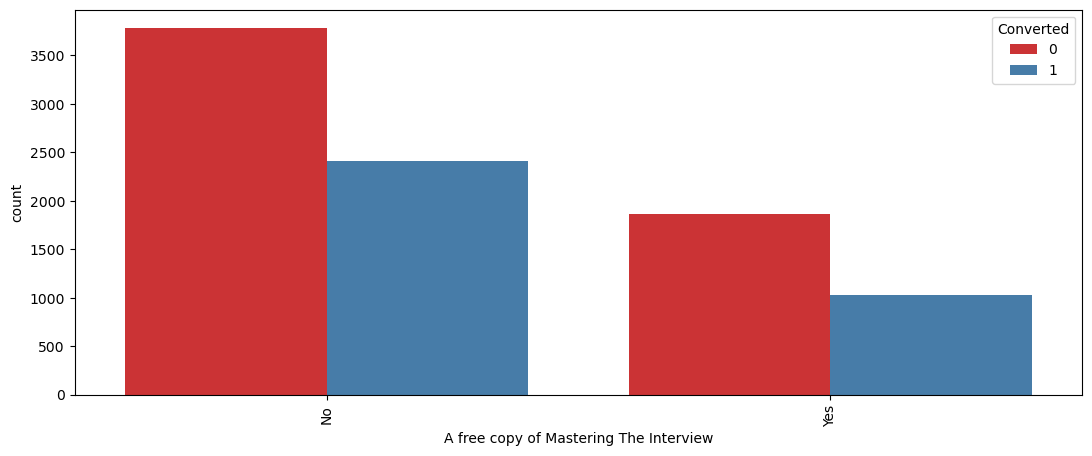

In [84]:
counterplot("A free copy of Mastering The Interview","Converted")

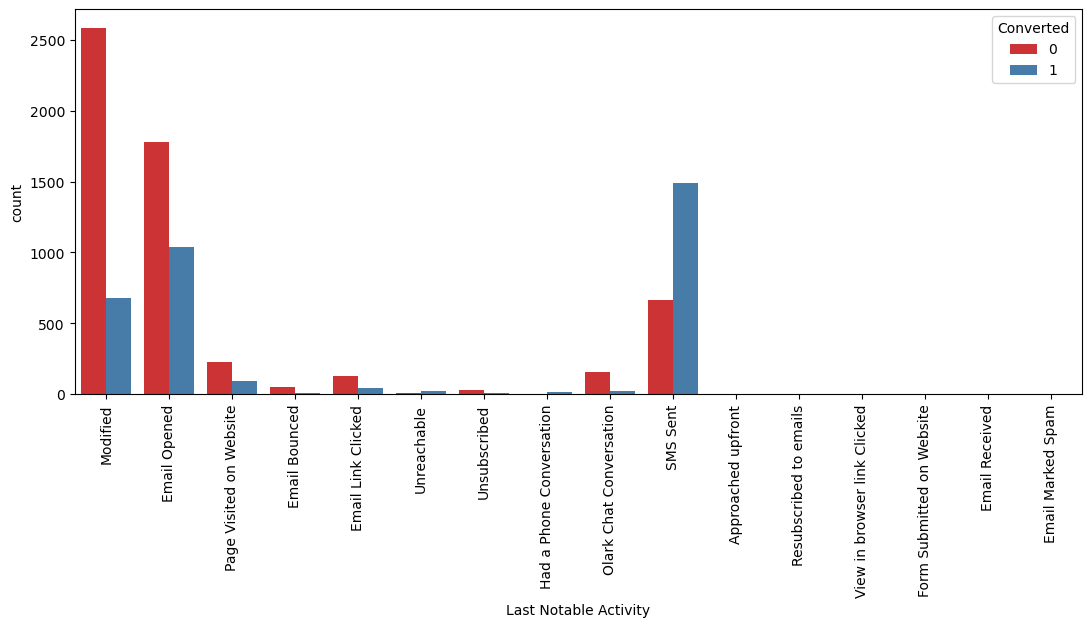

In [85]:
counterplot("Last Notable Activity","Converted")

In [86]:
#Based on Univariate analysis 

# List of unneccessary columns to drop
columns_to_drop = ['Magazine', 'Search', 'Newspaper Article', 'X Education Forums','Country',
                   'Newspaper', 'Digital Advertisement', 'Lead Number', 'Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Prospect ID',
 'Get updates on DM Content','I agree to pay the amount through cheque']

# Drop each column in the list using a loop
for column in columns_to_drop:
    if column in lead_df.columns:  
        lead_df = lead_df.drop(column, axis=1)
        
lead_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

### Data Preparation

##### Converting binary varibales

In [87]:
# Define the columns to convert in to list
columns_to_convert = ['Do Not Email', 'Do Not Call']

# Convert categorical values to binary using replace
lead_df[columns_to_convert] = lead_df[columns_to_convert].replace({'Yes': 1, 'No': 0})

#### Create dummy variables 

In [88]:
lead_df.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [89]:
# Create dummies and concatenate them to the original DataFrame
lead_df = pd.concat([lead_df.drop(columns=lead_df.select_dtypes(include=['object']).columns),
                  pd.get_dummies(lead_df.select_dtypes(include=['object']), drop_first=True).astype(int)], 
                 axis=1)

In [90]:
lead_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the data into train and test set

In [91]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

In [92]:
#Features varible
features_set=lead_df.drop(['Converted'], axis=1)
features_set.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [93]:
#Target a varible
response=lead_df['Converted']
response.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [94]:
# Split the data
train_features, test_features, train_response, test_response = train_test_split(
    features_set, response, train_size=0.7, test_size=0.3, random_state=100
)

In [95]:
train_features

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2.0,397,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,2.0,1380,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,5.0,1584,2.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,5.0,809,5.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
82,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8199,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7077,0,0,5.0,459,5.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
lead_numbers = lead_df.select_dtypes(include=['float64', 'int64'])

### Scaling Data 


In [97]:
#import Standrad Scalers
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
varible_list = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
# Fit the scaler and transform the selected variables in one step
train_features[varible_list] = scaler.fit_transform(train_features[varible_list])

In [99]:
train_features.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
#Conversion Rate in Terms of Percentage
conv_rate = lead_df['Converted'].mean() * 100
print(conv_rate)

37.85541106458012


#### Conversion rate to be 37.85

### Feature Selection Using RFE

In [101]:
import statsmodels.api as sm
# Create the logistic regression model using GLM with a logistic link function
log_reg = sm.GLM(train_response, sm.add_constant(train_features), 
                  family=sm.families.Binomial())

# Fit the model
log_reg_fit = log_reg.fit()
print(log_reg_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.6
Date:                Tue, 22 Oct 2024   Deviance:                       5069.3
Time:                        18:59:41   Pearson chi2:                 6.40e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4143
Covariance Type:            nonrobust                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

# Feature Selections

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logistic_reg = LogisticRegression()
rfe_model =RFE(logistic_reg,n_features_to_select = 20)
rfe_model = rfe_model.fit(train_features, train_response)

In [103]:
rfe_model.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False])

In [104]:
# Create a list of tuples with feature names, selection status, and rankings
feature_selection_summary = list(zip(train_features.columns, rfe_model.support_, rfe_model.ranking_))

# Print the feature selection summary
for feature in feature_selection_summary:
    print(feature)

('Do Not Email', True, 1)
('Do Not Call', False, 8)
('TotalVisits', False, 22)
('Total Time Spent on Website', True, 1)
('Page Views Per Visit', False, 21)
('Lead Origin_Landing Page Submission', True, 1)
('Lead Origin_Lead Add Form', True, 1)
('Lead Origin_Lead Import', True, 1)
('Lead Source_Facebook', False, 28)
('Lead Source_Google', False, 30)
('Lead Source_Olark Chat', True, 1)
('Lead Source_Organic Search', False, 40)
('Lead Source_Others', False, 32)
('Lead Source_Reference', True, 1)
('Lead Source_Referral Sites', False, 42)
('Lead Source_Welingak Website', True, 1)
('Last Activity_Email Bounced', False, 16)
('Last Activity_Email Link Clicked', False, 12)
('Last Activity_Email Opened', False, 7)
('Last Activity_Form Submitted on Website', False, 33)
('Last Activity_Olark Chat Conversation', True, 1)
('Last Activity_Other_Activity', True, 1)
('Last Activity_Page Visited on Website', False, 11)
('Last Activity_SMS Sent', True, 1)
('Last Activity_Unreachable', False, 10)
('Last A

In [105]:
# Create a DataFrame to display selected features
selected_columns = train_features.columns[rfe_model.support_]
# Display the DataFrame
print(selected_columns)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [106]:
train_features.columns[~rfe_model.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Ret

In [107]:
train_features_sm = sm.add_constant(train_features[selected_columns])
log_reg_1 = sm.GLM(train_response,train_features_sm, family = sm.families.Binomial())
res = log_reg_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 22 Oct 2024   Deviance:                       5180.6
Time:                        18:59:50   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

In [108]:
# Make predictions on the training set
train_response_pred = res.predict(train_features_sm)
print(train_response_pred[:10])


3009    0.186699
1012    0.111516
9226    0.332959
4750    0.866724
7987    0.805274
1281    0.744065
2880    0.093587
4971    0.963838
7536    0.851027
1248    0.776036
dtype: float64


In [109]:
# Convert predictions to a NumPy array and ensure it's 1D
train_response_pred = train_response_pred.values.reshape(-1)
train_response_pred[:10]


array([0.18669872, 0.11151621, 0.33295931, 0.86672449, 0.80527418,
       0.74406546, 0.09358717, 0.963838  , 0.85102674, 0.77603595])

In [110]:
# Convert predictions to a DataFrame
train_response_pred_final = pd.DataFrame({
    'converted': train_response.values,                      # Actual values
    'Conversion_Prob': train_response_pred.flatten()         # Predicted probabilities
})

# Add the ID from the original index
train_response_pred_final['ID'] = train_response.index

# Convert probabilities to binary classifications 
train_response_pred_final['Convert'] = train_response_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows of the final DataFrame
print(train_response_pred_final.head())

   converted  Conversion_Prob    ID  Convert
0          0         0.186699  3009        0
1          0         0.111516  1012        0
2          0         0.332959  9226        0
3          1         0.866724  4750        1
4          1         0.805274  7987        1


## Generating a Confusion Matrix

In [111]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
confusion = confusion_matrix(train_response_pred_final['converted'], train_response_pred_final['Convert'], labels=[1, 0])

# Print the confusion matrix
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1725  721]
 [ 440 3465]]


In [112]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(train_response_pred_final['converted'], train_response_pred_final['Convert'])

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.72%


##### The model achieved an overall accuracy of 81.72%, which indicates a solid performance.

In [113]:
# Extract True Negatives(TN) ,False Positives(FP), False Negatives (FN) and True Positives (TP)
TN = confusion[0, 0]  
FP = confusion[0, 1]  
FN = confusion[1, 0]  
TP = confusion[1, 1]  

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate PPV (Precision) and NPV
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Positive Predictive Value : {ppv * 100:.2f}%")
print(f"Negative Predictive Value : {npv * 100:.2f}%")

Sensitivity: 88.73%
Specificity: 70.52%
Positive Predictive Value : 82.78%
Negative Predictive Value : 79.68%


## Evaluating the VIF (Variance Inflation Factor) values.


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a function to calculate VIF
def calculate_vif(features):
    vif_data = pd.DataFrame()
    vif_data['Features'] = features.columns
    vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif_data['VIF'] = round(vif_data['VIF'], 2)
    return vif_data.sort_values(by="VIF", ascending=False)

# Calculate VIF for the selected features
vif_result = calculate_vif(train_features[selected_columns])

# Display the VIF results
vif_result


,Features,VIF
3,Lead Origin_Lead Add Form,62.65
6,Lead Source_Reference,48.10
7,Lead Source_Welingak Website,15.51
15,What is your current occupation_Unemployed,12.47
2,Lead Origin_Landing Page Submission,7.30
12,Specialization_Others,4.65
5,Lead Source_Olark Chat,2.32
18,Last Notable Activity_Modified,1.87
16,What is your current occupation_Working Profes...,1.82
10,Last Activity_SMS Sent,1.64


In [115]:
# drop the column because it has high p value
selected_columns=selected_columns.drop('What is your current occupation_Housewife')
print(selected_columns)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [116]:
# Summary
train_features_sm = sm.add_constant( train_features[selected_columns])
log_reg_1 = sm.GLM(train_response, train_features_sm, family = sm.families.Binomial())
res = log_reg_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 22 Oct 2024   Deviance:                       5184.5
Time:                        18:59:51   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

In [117]:
# drop the column because it has high p value
selected_columns=selected_columns.drop('Last Notable Activity_Had a Phone Conversation')
print(selected_columns)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [118]:
# Summary
train_features_sm = sm.add_constant( train_features[selected_columns])
log_reg_2 = sm.GLM(train_response, train_features_sm, family = sm.families.Binomial())
res = log_reg_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 22 Oct 2024   Deviance:                       5186.1
Time:                        18:59:51   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

In [119]:
# drop the column because it has high p value
selected_columns=selected_columns.drop('What is your current occupation_Student')
print(selected_columns)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [120]:
# Summary
train_features_sm = sm.add_constant( train_features[selected_columns])
log_reg_3 = sm.GLM(train_response, train_features_sm, family = sm.families.Binomial())
res = log_reg_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 22 Oct 2024   Deviance:                       5189.0
Time:                        18:59:51   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

In [121]:
# drop the column because it has high p value
selected_columns=selected_columns.drop('Lead Origin_Lead Import')
print(selected_columns)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [122]:
# Summary
train_features_sm = sm.add_constant( train_features[selected_columns])
log_reg_4 = sm.GLM(train_response, train_features_sm, family = sm.families.Binomial())
res = log_reg_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.1
Date:                Tue, 22 Oct 2024   Deviance:                       5192.2
Time:                        18:59:52   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4766      0.239      1.990      0.047       0.007       0.946
Do Not Email                                            -1.6805      0.191     -8.819      0.000      -2.054      -1.307
Total Time Spent on Website                              1.0993      0.040     27.196      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1649      0.128     -9.108      0.000      -1.416      -0.914
Lead Origin_Lead Add Form                                1.5665      0.913      1.717      0.086      -0.222       3.355
Lead Source_Olark Chat                                   1.0918      0.123      8.890      0.000       0.851       1.333
Lead Source_Reference                                    1.7756      0.936      1.897      0.058      -0.059       3.610
Lead Source_Welingak Website                             4.3089      1.164      3.702      0.000       2.028       6.590
Last Activity_Olark Chat Conversation                   -0.9529      0.172     -5.548      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2201      0.463      4.800      0.000       1.314       3.127
Last Activity_SMS Sent                                   1.3398      0.076     17.703      0.000       1.191       1.488
Last Activity_Unsubscribed                               1.4049      0.482      2.913      0.004       0.460       2.350
Specialization_Others                                   -1.1752      0.126     -9.356      0.000      -1.421      -0.929
What is your current occupation_Unemployed              -0.5952      0.213     -2.795      0.005      -1.013      -0.178
What is your current occupation_Working Professional     2.0332      0.283      7.181      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8743      0.081    -10.733      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5666      0.475      3.296      0.001       0.635       2.498
========================================================================================================================
"""

In [123]:
## Above model has p values less than 0.05 for all vars

In [124]:
# Make predictions on the training set
train_response_pred = res.predict(train_features_sm)
print(train_response_pred[:10])

3009    0.188518
1012    0.108673
9226    0.328838
4750    0.865627
7987    0.802186
1281    0.743472
2880    0.095147
4971    0.964910
7536    0.849315
1248    0.772860
dtype: float64


In [125]:
# Convert predictions to a NumPy array and ensure it's 1D
train_response_pred = train_response_pred.values.reshape(-1)
train_response_pred[:10]


array([0.18851831, 0.10867303, 0.32883761, 0.86562656, 0.80218597,
       0.74347175, 0.09514657, 0.96490964, 0.84931485, 0.77286023])

In [126]:
# Convert predictions to a DataFrame
train_response_pred_final = pd.DataFrame({
    'converted': train_response.values,                      # Actual values
    'Conversion_Prob': train_response_pred.flatten()         # Predicted probabilities
})

# Add the ID from the original index
train_response_pred_final['ID'] = train_response.index

# Convert probabilities to binary classifications 
train_response_pred_final['Convert'] = train_response_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows of the final DataFrame
print(train_response_pred_final.head())

   converted  Conversion_Prob    ID  Convert
0          0         0.188518  3009        0
1          0         0.108673  1012        0
2          0         0.328838  9226        0
3          1         0.865627  4750        1
4          1         0.802186  7987        1


## Generating a Confusion Matrix

In [127]:
# Generate confusion matrix
confusion = confusion_matrix(train_response_pred_final['converted'], train_response_pred_final['Convert'], labels=[1, 0])

# Print the confusion matrix
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1728  718]
 [ 442 3463]]


In [128]:
# Calculate accuracy
accuracy = accuracy_score(train_response_pred_final['converted'], train_response_pred_final['Convert'])

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.74%


In [129]:
# Extract True Negatives(TN) ,False Positives(FP), False Negatives (FN) and True Positives (TP)
TN = confusion[0, 0]  
FP = confusion[0, 1]  
FN = confusion[1, 0]  
TP = confusion[1, 1]  

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate PPV (Precision) and NPV
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Positive Predictive Value : {ppv * 100:.2f}%")
print(f"Negative Predictive Value : {npv * 100:.2f}%")

Sensitivity: 88.68%
Specificity: 70.65%
Positive Predictive Value : 82.83%
Negative Predictive Value : 79.63%


## Evaluating the VIF (Variance Inflation Factor) values

In [130]:
# Calculate VIF for the selected features
vif_result = calculate_vif(train_features[selected_columns])

# Display the VIF results
vif_result

,Features,VIF
3,Lead Origin_Lead Add Form,62.59
5,Lead Source_Reference,48.08
6,Lead Source_Welingak Website,15.51
12,What is your current occupation_Unemployed,9.59
2,Lead Origin_Landing Page Submission,5.69
11,Specialization_Others,3.99
4,Lead Source_Olark Chat,2.22
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.64
9,Last Activity_SMS Sent,1.63


In [131]:
# droping the collum for high VIF
selected_columns=selected_columns.drop('Lead Origin_Lead Add Form')
print(selected_columns)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [132]:
# Summary
train_features_sm = sm.add_constant( train_features[selected_columns])
log_reg_5 = sm.GLM(train_response, train_features_sm, family = sm.families.Binomial())
res = log_reg_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.7
Date:                Tue, 22 Oct 2024   Deviance:                       5195.5
Time:                        18:59:53   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4926      0.239      2.058      0.040       0.024       0.962
Do Not Email                                            -1.6821      0.191     -8.827      0.000      -2.056      -1.309
Total Time Spent on Website                              1.0975      0.040     27.191      0.000       1.018       1.177
Lead Origin_Landing Page Submission                     -1.1824      0.128     -9.266      0.000      -1.432      -0.932
Lead Source_Olark Chat                                   1.0855      0.123      8.857      0.000       0.845       1.326
Lead Source_Reference                                    3.3281      0.242     13.744      0.000       2.853       3.803
Lead Source_Welingak Website                             5.8665      0.729      8.042      0.000       4.437       7.296
Last Activity_Olark Chat Conversation                   -0.9572      0.172     -5.575      0.000      -1.294      -0.621
Last Activity_Other_Activity                             2.2163      0.462      4.792      0.000       1.310       3.123
Last Activity_SMS Sent                                   1.3399      0.076     17.708      0.000       1.192       1.488
Last Activity_Unsubscribed                               1.4034      0.482      2.910      0.004       0.458       2.348
Specialization_Others                                   -1.1865      0.125     -9.455      0.000      -1.432      -0.941
What is your current occupation_Unemployed              -0.5924      0.213     -2.781      0.005      -1.010      -0.175
What is your current occupation_Working Professional     2.0329      0.283      7.178      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8747      0.081    -10.743      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5623      0.475      3.287      0.001       0.631       2.494
========================================================================================================================
"""

In [133]:
# Make predictions on the training set
train_response_pred = res.predict(train_features_sm)
print(train_response_pred[:10])

3009    0.188777
1012    0.107347
9226    0.329398
4750    0.865442
7987    0.801752
1281    0.743428
2880    0.095408
4971    0.965428
7536    0.848837
1248    0.772433
dtype: float64


In [134]:
# Convert predictions to a NumPy array and ensure it's 1D
train_response_pred = train_response_pred.values.reshape(-1)
train_response_pred[:10]

array([0.18877706, 0.10734731, 0.32939835, 0.86544213, 0.80175244,
       0.74342827, 0.09540835, 0.96542802, 0.84883739, 0.77243305])

In [135]:
# Convert predictions to a DataFrame
train_response_pred_final = pd.DataFrame({
    'converted': train_response.values,                      # Actual values
    'Conversion_Prob': train_response_pred.flatten()         # Predicted probabilities
})

# Add the ID from the original index
train_response_pred_final['ID'] = train_response.index

# Convert probabilities to binary classifications 
train_response_pred_final['Convert'] = train_response_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows of the final DataFrame
print(train_response_pred_final.head())

   converted  Conversion_Prob    ID  Convert
0          0         0.188777  3009        0
1          0         0.107347  1012        0
2          0         0.329398  9226        0
3          1         0.865442  4750        1
4          1         0.801752  7987        1


## Generating a Confusion Matrix

In [136]:
# Generate confusion matrix
confusion = confusion_matrix(train_response_pred_final['converted'], train_response_pred_final['Convert'], labels=[1, 0])

# Print the confusion matrix
print("Confusion Matrix:\n", confusion)
# Calculate accuracy
accuracy = accuracy_score(train_response_pred_final['converted'], train_response_pred_final['Convert'])

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Extract True Negatives(TN) ,False Positives(FP), False Negatives (FN) and True Positives (TP)
TN = confusion[0, 0]  
FP = confusion[0, 1]  
FN = confusion[1, 0]  
TP = confusion[1, 1]  

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate PPV (Precision) and NPV
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Positive Predictive Value : {ppv * 100:.2f}%")
print(f"Negative Predictive Value : {npv * 100:.2f}%")

Confusion Matrix:
 [[1737  709]
 [ 443 3462]]
Accuracy: 81.86%
Sensitivity: 88.66%
Specificity: 71.01%
Positive Predictive Value : 83.00%
Negative Predictive Value : 79.68%


## Evaluating the VIF (Variance Inflation Factor) values

In [137]:
# Calculate VIF for the selected features
vif_result = calculate_vif(train_features[selected_columns])

# Display the VIF results
vif_result

,Features,VIF
11,What is your current occupation_Unemployed,9.56
2,Lead Origin_Landing Page Submission,5.67
10,Specialization_Others,3.98
3,Lead Source_Olark Chat,2.22
13,Last Notable Activity_Modified,1.86
12,What is your current occupation_Working Profes...,1.64
8,Last Activity_SMS Sent,1.63
6,Last Activity_Olark Chat Conversation,1.59
4,Lead Source_Reference,1.45
1,Total Time Spent on Website,1.31


In [138]:
# droping the collum for high VIF
selected_columns=selected_columns.drop('What is your current occupation_Unemployed')
print(selected_columns)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [139]:
# Summary
train_features_sm = sm.add_constant( train_features[selected_columns])
log_reg_6 = sm.GLM(train_response, train_features_sm, family = sm.families.Binomial())
res = log_reg_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 22 Oct 2024   Deviance:                       5203.0
Time:                        18:59:53   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [140]:
# Make predictions on the training set
train_response_pred = res.predict(train_features_sm)
print(train_response_pred[:10])

3009    0.192492
1012    0.107074
9226    0.329484
4750    0.866550
7987    0.802188
1281    0.745221
2880    0.097496
4971    0.965877
7536    0.851963
1248    0.772910
dtype: float64


In [141]:
# Convert predictions to a NumPy array and ensure it's 1D
train_response_pred = train_response_pred.values.reshape(-1)
train_response_pred[:10]

array([0.19249248, 0.10707422, 0.32948401, 0.86654975, 0.80218826,
       0.74522141, 0.09749634, 0.96587701, 0.85196293, 0.77291036])

In [142]:
# Convert predictions to a DataFrame
train_response_pred_final = pd.DataFrame({
    'converted': train_response.values,                      # Actual values
    'Conversion_Prob': train_response_pred.flatten()         # Predicted probabilities
})

# Add the ID from the original index
train_response_pred_final['ID'] = train_response.index

# Convert probabilities to binary classifications 
train_response_pred_final['Convert'] = train_response_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows of the final DataFrame
print(train_response_pred_final.head())

   converted  Conversion_Prob    ID  Convert
0          0         0.192492  3009        0
1          0         0.107074  1012        0
2          0         0.329484  9226        0
3          1         0.866550  4750        1
4          1         0.802188  7987        1


In [143]:
# Generate confusion matrix
confusion = confusion_matrix(train_response_pred_final['converted'], train_response_pred_final['Convert'], labels=[1, 0])

# Print the confusion matrix
print("Confusion Matrix:\n", confusion)
# Calculate accuracy
accuracy = accuracy_score(train_response_pred_final['converted'], train_response_pred_final['Convert'])

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Extract True Negatives(TN) ,False Positives(FP), False Negatives (FN) and True Positives (TP)
TN = confusion[0, 0]  
FP = confusion[0, 1]  
FN = confusion[1, 0]  
TP = confusion[1, 1]  

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate PPV (Precision) and NPV
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Positive Predictive Value : {ppv * 100:.2f}%")
print(f"Negative Predictive Value : {npv * 100:.2f}%")

Confusion Matrix:
 [[1736  710]
 [ 446 3459]]
Accuracy: 81.80%
Sensitivity: 88.58%
Specificity: 70.97%
Positive Predictive Value : 82.97%
Negative Predictive Value : 79.56%


In [144]:
# Calculate VIF for the selected features
vif_result = calculate_vif(train_features[selected_columns])

# Display the VIF results
vif_result

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [145]:
# All VIF are under 5.

#### Above model has p values less than 0.5 for all vars and VIF less than 5

## ROC curve

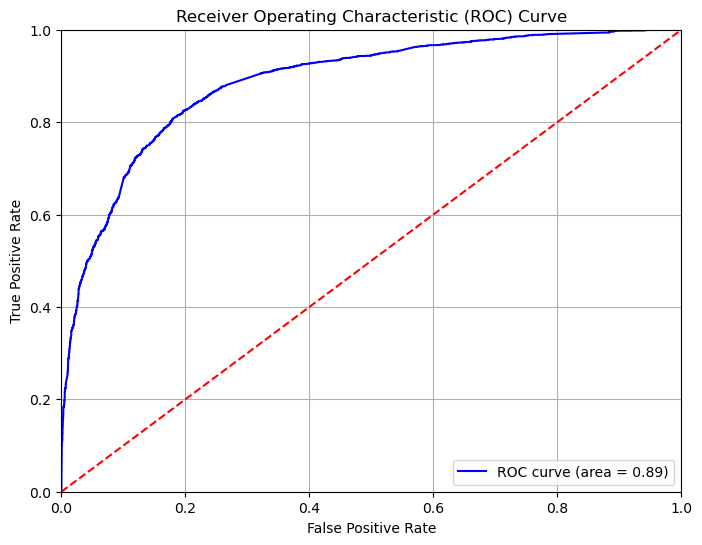

In [146]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve( train_response_pred_final.converted, train_response_pred_final.Conversion_Prob, drop_intermediate = False)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##  Optimal Cutoff Point

In [147]:
# Generate cutoff probabilities
cutoff_values = [float(x) / 10 for x in range(10)]
for cutoff in cutoff_values:
    train_response_pred_final[cutoff] = train_response_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
train_response_pred_final.head(10)

,converted,Conversion_Prob,ID,Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0
5,1,0.745221,1281,1,1,1,1,1,1,1,1,1,0,0
6,0,0.097496,2880,0,1,0,0,0,0,0,0,0,0,0
7,1,0.965877,4971,1,1,1,1,1,1,1,1,1,1,1
8,1,0.851963,7536,1,1,1,1,1,1,1,1,1,1,0
9,0,0.772910,1248,1,1,1,1,1,1,1,1,1,0,0


In [148]:
# Initialize DataFrame to store metrics
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

# Calculate metrics for each cutoff
for cutoff in cutoff_values:
    cm = confusion_matrix(train_response_pred_final.converted, train_response_pred_final[cutoff])
    total = np.sum(cm)
    
    # Avoid division by zero
    accuracy = (cm[0, 0] + cm[1, 1]) / total if total > 0 else 0
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
    
    cutoff_df.loc[cutoff] = [cutoff, accuracy, sensitivity, specificity]

# Display the cutoff DataFrame
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.591718     0.972200     0.353393
0.2          0.2  0.749488     0.915781     0.645327
0.3          0.3  0.800976     0.851594     0.769270
0.4          0.4  0.816249     0.775961     0.841485
0.5          0.5  0.817981     0.709730     0.885787
0.6          0.6  0.798614     0.602617     0.921383
0.7          0.7  0.786963     0.529027     0.948528
0.8          0.8  0.762557     0.427228     0.972599
0.9          0.9  0.722248     0.298446     0.987708


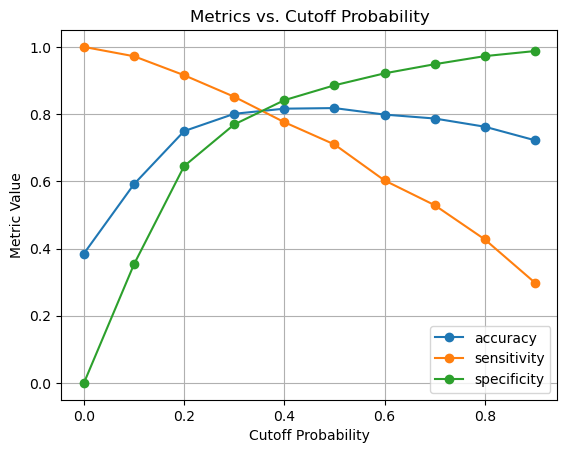

In [149]:
# Plot the metrics
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'], marker='o')
plt.title('Metrics vs. Cutoff Probability')
plt.xlabel('Cutoff Probability')
plt.ylabel('Metric Value')
plt.grid()
plt.show()

In [150]:
# Map predicted probabilities to binary outcomes based on the chosen cutoff
train_response_pred_final['final_predicted'] = train_response_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Display the first few rows to verify the changes
train_response_pred_final.head()

,converted,Conversion_Prob,ID,Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [151]:
# Generate Lead Score
train_response_pred_final['Lead_Score'] = train_response_pred_final.Conversion_Prob.map(lambda x: round(x*100))
train_response_pred_final.head()

,converted,Conversion_Prob,ID,Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1,80


In [152]:
# Generate confusion matrix
confusion_1 = confusion_matrix(train_response_pred_final['converted'], train_response_pred_final['Convert'], labels=[1, 0])

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_1)
# Calculate accuracy
accuracy_1 = accuracy_score(train_response_pred_final['converted'], train_response_pred_final['Convert'])

# Print the accuracy
print(f"Accuracy: {accuracy_1 * 100:.2f}%")

# Extract True Negatives(TN) ,False Positives(FP), False Negatives (FN) and True Positives (TP)
TN = confusion_1[0, 0]  
FP = confusion_1[0, 1]  
FN = confusion_1[1, 0]  
TP = confusion_1[1, 1]  

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate PPV (Precision) and NPV
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Positive Predictive Value : {ppv * 100:.2f}%")
print(f"Negative Predictive Value : {npv * 100:.2f}%")

Confusion Matrix:
 [[1736  710]
 [ 446 3459]]
Accuracy: 81.80%
Sensitivity: 88.58%
Specificity: 70.97%
Positive Predictive Value : 82.97%
Negative Predictive Value : 79.56%


# Making Predictions on the Test Dataset

In [153]:
test_features.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,4.0,157,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,5.0,1513,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,2.0,74,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,8.0,164,6.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
from sklearn.pipeline import Pipeline

# Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fit the scaler on the training data and transform the test data
test_features_scaled = scaling_pipeline.fit(test_features[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]).transform(test_features[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

# Assign scaled values back to test_features
test_features[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = test_features_scaled

In [155]:
test_features=test_features[selected_columns]
test_features

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.591008,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.894051,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.878732,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.578179,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0,0.640526,1,0,0,0,0,0,0,0,0,0,1,0
2879,0,0.200692,1,0,0,0,0,0,0,0,0,0,1,0
6501,0,1.567841,1,0,0,0,0,0,1,0,0,0,0,0
7155,0,0.065077,1,0,0,0,0,0,0,0,0,0,1,0


In [156]:
# Make predictions on the Test data
test_features_scaled= sm.add_constant(test_features)
test_response_prediction = res.predict(test_features_scaled)
test_response_prediction[:10]

3271    0.128005
1490    0.968549
7936    0.110497
4216    0.805698
3830    0.130945
1800    0.631051
6507    0.345697
4821    0.299301
4223    0.919132
4714    0.331894
dtype: float64

In [157]:
test_response_prediction_final = pd.DataFrame(test_response_prediction)
test_response_prediction_final.head()

,0
3271,0.128005
1490,0.968549
7936,0.110497
4216,0.805698
3830,0.130945


In [158]:
# Create DataFrame for test_response and assign the predicted values
test_response_df = pd.DataFrame({'Converted': test_response})
test_response_df['ID'] = test_response_df.index

# Reset the index of y_pred_1
test_response_prediction_final .reset_index(drop=True, inplace=True)

# Use assign to add predictions
test_response_final = test_response_df.assign(Predicted=test_response_prediction_final.values)

In [159]:
test_response_final.head()

,Converted,ID,Predicted
3271,0,3271,0.128005
1490,1,1490,0.968549
7936,0,7936,0.110497
4216,1,4216,0.805698
3830,0,3830,0.130945


In [160]:
test_response_final['final_predicted'] = test_response_final.Predicted.map(lambda x: 1 if x > 0.35 else 0)

In [161]:
test_response_final.head()


,Converted,ID,Predicted,final_predicted
3271,0,3271,0.128005,0
1490,1,1490,0.968549,1
7936,0,7936,0.110497,0
4216,1,4216,0.805698,1
3830,0,3830,0.130945,0


In [162]:
# Generate Lead Score
test_response_final['Lead_Score'] = test_response_final.Predicted.map(lambda x: round(x*100))
test_response_final.head()

,Converted,ID,Predicted,final_predicted,Lead_Score
3271,0,3271,0.128005,0,13
1490,1,1490,0.968549,1,97
7936,0,7936,0.110497,0,11
4216,1,4216,0.805698,1,81
3830,0,3830,0.130945,0,13


In [163]:
# Generate confusion matrix
confusion_2 = confusion_matrix(test_response_final['Converted'], test_response_final['final_predicted'], labels=[1, 0])

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_2)
# Calculate accuracy
accuracy_2 = accuracy_score(test_response_final['Converted'], test_response_final['final_predicted'])

# Print the accuracy
print(f"Accuracy: {accuracy_2 * 100:.2f}%")

# Extract True Negatives(TN) ,False Positives(FP), False Negatives (FN) and True Positives (TP)
TN = confusion_2[0, 0]  
FP = confusion_2[0, 1]  
FN = confusion_2[1, 0]  
TP = confusion_2[1, 1]  

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate PPV (Precision) and NPV
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Positive Predictive Value : {ppv * 100:.2f}%")
print(f"Negative Predictive Value : {npv * 100:.2f}%")

Confusion Matrix:
 [[ 791  198]
 [ 327 1407]]
Accuracy: 80.72%
Sensitivity: 81.14%
Specificity: 79.98%
Positive Predictive Value : 87.66%
Negative Predictive Value : 70.75%


#### Train Vs Test

> Train
- Accuracy: 81.80%
- Sensitivity: 88.58%
- Specificity: 70.97%
  
> Test
- Accuracy: 80.72%
- Sensitivity: 81.14%
- Specificity: 79.98%

In [164]:
# Get features contribution 

In [165]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.858769
Lead Source_Reference                                   3.340121
What is your current occupation_Working Professional    2.606375
Last Activity_Other_Activity                            2.198777
Last Notable Activity_Unreachable                       1.546980
Last Activity_Unsubscribed                              1.378366
Last Activity_SMS Sent                                  1.325023
Total Time Spent on Website                             1.097643
Lead Source_Olark Chat                                  1.091475
const                                                  -0.071692
Last Notable Activity_Modified                         -0.881599
Last Activity_Olark Chat Conversation                  -0.948539
Lead Origin_Landing Page Submission                    -1.186301
Specialization_Others                                  -1.198306
Do Not Email                                           -1.678278
dtype: float64

### Recommendation 

- The company should make calls to the leads coming from the lead sources "Welingak Websites" & "Reference" as these are more likely to get converted.
- Also to working professionals
- Also whoes last activity SMS sent or others
- Also who spend more time on website
- Also leads coming from Olark Chat
- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
- Or should not make call to leads coming from Landing page submission
- Or those leads whoes do not email is active